## Task 1: Dataset Combination

### B. Combine Lab2 D1A with Lab2 D1B without duplicate columns
### C. Combine Lab2 D1A with Lab2 D1C using merge method

In [3]:
import pandas as pd


df_a = pd.read_csv('Lab2 D1A.csv')
df_b = pd.read_csv('Lab2 D1B.csv')


df_b_cleaned = df_b.loc[:, ~df_b.columns.duplicated()]


merged_ab = pd.merge(df_a, df_b_cleaned, on=['name', 'population', 'county'])


print("Columns of the merged dataset:", merged_ab.columns.tolist())
print("\nShape of the final dataset:", merged_ab.shape)
print("\nFirst 5 rows of the combined dataset:")
print(merged_ab.head())



Columns of the merged dataset: ['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level', 'enrollment', 'level.1']

Shape of the final dataset: (27033, 9)

First 5 rows of the combined dataset:
    fid                                        name  population     county  \
0  9001               NEW ENGLAND CHRISTIAN ACADEMY         136    BRISTOL   
1  9002                     SETON ACADEMY FOR GIRLS          57    BRISTOL   
2  9003                              ST ANNA SCHOOL         157  WORCESTER   
3  9004  SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL           5   PLYMOUTH   
4  9005                             DEVEREUX SCHOOL         123  WORCESTER   

    latitude  longitude                              level  enrollment  \
0  41.758597 -71.175801  Combined elementary and secondary         120   
1  41.718407 -71.147302                         Elementary          49   
2  42.517271 -71.751741                         Elementary         143   
3  41.818210 -71.083393   

In [5]:

df_a = pd.read_csv('Lab2 D1A.csv')
df_c = pd.read_csv('Lab2 D1C.csv')


comboAC = pd.merge(df_a, df_c, on='county', how='inner')


print("Shape of the 'comboAC' dataset:", comboAC.shape)
print("\nFirst 5 rows of the 'comboAC' dataset:")
print(comboAC.head())

Shape of the 'comboAC' dataset: (4221333, 7)

First 5 rows of the 'comboAC' dataset:
    fid                           name  population   county   latitude  \
0  9001  NEW ENGLAND CHRISTIAN ACADEMY         136  BRISTOL  41.758597   
1  9001  NEW ENGLAND CHRISTIAN ACADEMY         136  BRISTOL  41.758597   
2  9001  NEW ENGLAND CHRISTIAN ACADEMY         136  BRISTOL  41.758597   
3  9001  NEW ENGLAND CHRISTIAN ACADEMY         136  BRISTOL  41.758597   
4  9001  NEW ENGLAND CHRISTIAN ACADEMY         136  BRISTOL  41.758597   

          city  score  
0      SWANSEA     16  
1   FALL RIVER      8  
2  NEW BEDFORD      8  
3    MANSFIELD     14  
4    ATTLEBORO      5  


## Task 2: Custom Dataset Creation and Merging

### A. Create customizedData dataset with specified attributes
### B. Merge customizedData with Lab2 datasets

In [6]:
import pandas as pd
import numpy as np


counties = ['BRISTOL', 'WORCESTER', 'PLYMOUTH', 'FRANKLIN', 'HAMPDEN', 'ESSEX']

data = {
    'county': np.random.choice(counties, size=15),
    'Size': np.random.choice(['small', 'medium', 'high'], size=15),
    'cardinal_direction': np.random.choice(['North', 'South', 'East', 'West'], size=15),
    'Timings': np.random.choice(['full time', 'part time'], size=15),
    'Funding_Type': np.random.choice(['Public', 'Private'], size=15),  # Categorical
    'Annual_Budget': np.random.randint(100000, 5000000, size=15)      # Continuous
}
customizedData = pd.DataFrame(data)

print("--- customizedData ---")
print("Shape:", customizedData.shape)
print("Columns:", customizedData.columns.tolist())
print("\nGenerated Data:")
print(customizedData)

--- customizedData ---
Shape: (15, 6)
Columns: ['county', 'Size', 'cardinal_direction', 'Timings', 'Funding_Type', 'Annual_Budget']

Generated Data:
       county    Size cardinal_direction    Timings Funding_Type  \
0       ESSEX  medium               East  full time       Public   
1    FRANKLIN    high              South  part time      Private   
2   WORCESTER  medium              North  full time      Private   
3     HAMPDEN  medium              North  part time      Private   
4     BRISTOL  medium               West  part time      Private   
5    FRANKLIN   small               West  full time      Private   
6    PLYMOUTH    high              South  full time      Private   
7     BRISTOL    high               West  part time       Public   
8   WORCESTER    high              North  part time       Public   
9    PLYMOUTH   small              South  part time      Private   
10   FRANKLIN  medium               East  full time       Public   
11   PLYMOUTH   small              

In [7]:

df_a = pd.read_csv('Lab2 D1A.csv')
df_b = pd.read_csv('Lab2 D1B.csv')
df_c = pd.read_csv('Lab2 D1C.csv')


df_b_cleaned = df_b.loc[:, ~df_b.columns.duplicated()]

merged_ab = pd.merge(df_a, df_b_cleaned, on=['name', 'population', 'county'])
original_merged = pd.merge(merged_ab, df_c, on='county')


print("--- Analysis Before Merging ---")
print("\n1. Combined Original Dataset (from D1A, D1B, D1C)")
print("   Shape:", original_merged.shape)
print("   Features:", original_merged.columns.tolist())

print("\n2. Customized Dataset (customizedData)")
print("   Shape:", customizedData.shape)
print("   Features:", customizedData.columns.tolist())

--- Analysis Before Merging ---

1. Combined Original Dataset (from D1A, D1B, D1C)
   Shape: (4235499, 11)
   Features: ['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level', 'enrollment', 'level.1', 'city', 'score']

2. Customized Dataset (customizedData)
   Shape: (15, 6)
   Features: ['county', 'Size', 'cardinal_direction', 'Timings', 'Funding_Type', 'Annual_Budget']


In [8]:

modifiedData = pd.merge(original_merged, customizedData, on='county', how='inner')


print("\n\n--- Analysis After Merging ---")
print("\nFinal Merged Dataset (modifiedData)")
print("   Shape:", modifiedData.shape)
print("   Features:", modifiedData.columns.tolist())



--- Analysis After Merging ---

Final Merged Dataset (modifiedData)
   Shape: (242090, 16)
   Features: ['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level', 'enrollment', 'level.1', 'city', 'score', 'Size', 'cardinal_direction', 'Timings', 'Funding_Type', 'Annual_Budget']


### Task 3

--- C. Correlation Calculation ---
Correlation Matrix:
                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


--- D. Linearity Analysis ---
Scatter plot matrix saved as 'linearity_plot.png'.
Analysis: The plots show scattered points with high concentrations at specific values, indicating a lack of linear relationships.


--- E. Missing Data Imputation ---
No missing values were found in the dataset.


--- F. Exploratory Data Analysis ---
1. Age vs. Satisfaction box plot saved as 'age_distribution.png'.
2. 'var38' distribution plot saved as 'var38_distribution.png'.
3. Bank products count plot saved as 'products_satisfaction.png'.

4. Correlation Matr

c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\cycle\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected the top 100 features using SelectKBest.
The top 10 selected features are:
['var15', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var5_0']




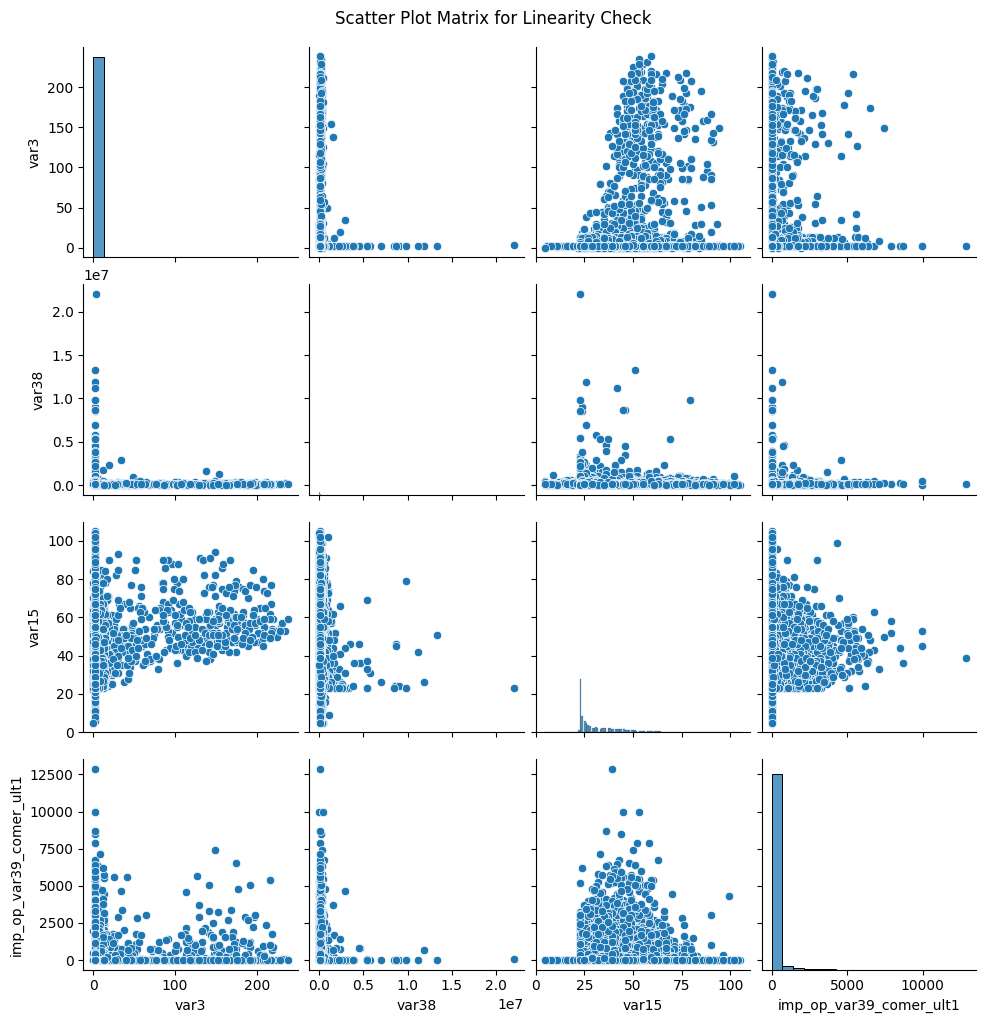

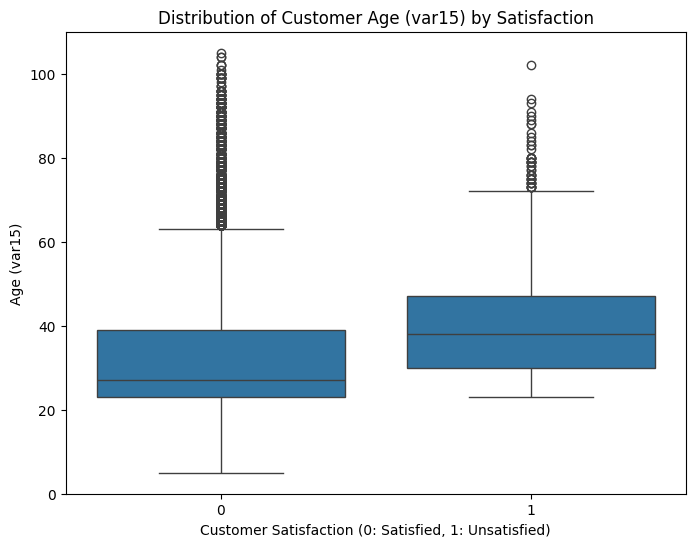

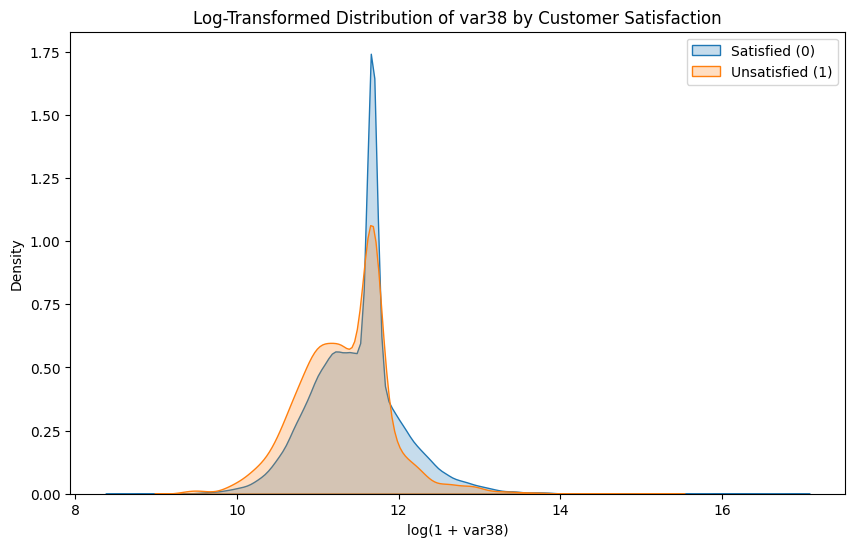

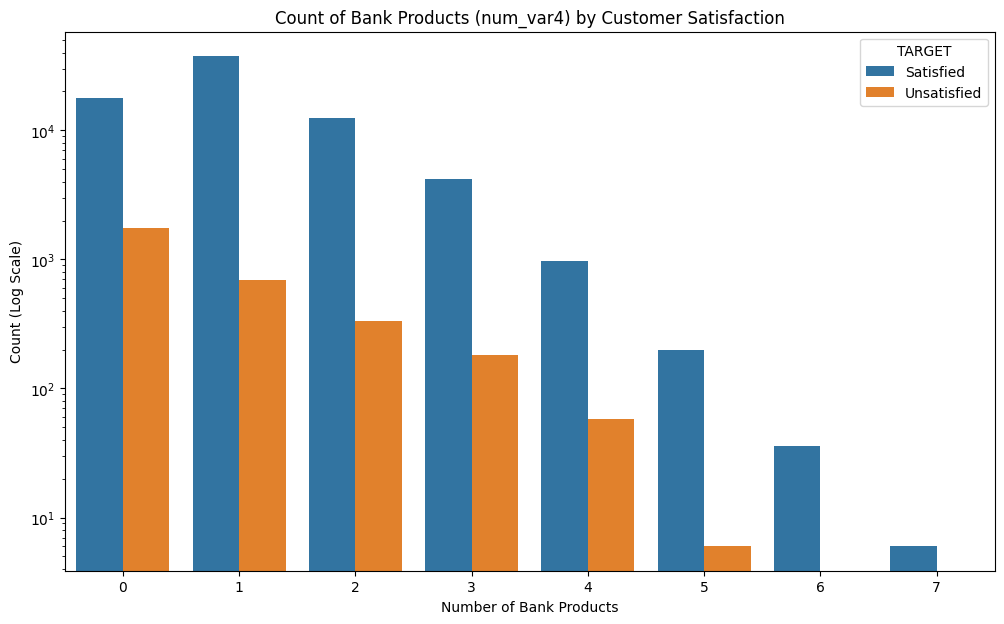

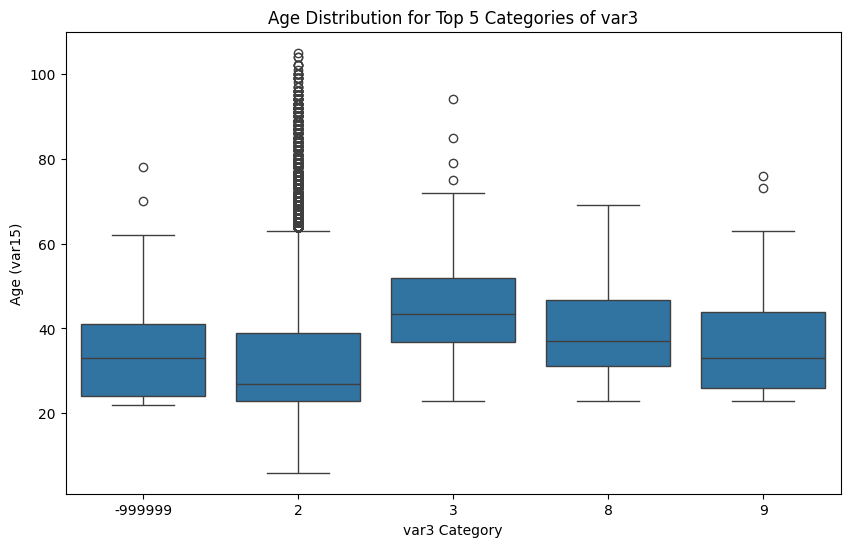

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset from the uploaded CSV file
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Ensure train.csv is in the same directory as the script.")
    exit()

# --- Task C: Calculate Correlation ---
print("--- C. Correlation Calculation ---")
correlation_vars = ['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']
correlation_matrix = df[correlation_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix)
print("\n" + "="*50 + "\n")

# --- Task D: Check for Linearity ---
print("--- D. Linearity Analysis ---")
# Replace a common outlier value for better visualization in plots
pairplot_df = df[correlation_vars].copy()
pairplot_df.replace(-999999, 0, inplace=True)
linearity_plot = sns.pairplot(pairplot_df)
linearity_plot.fig.suptitle('Scatter Plot Matrix for Linearity Check', y=1.02)
linearity_plot.savefig('linearity_plot.png')
print("Scatter plot matrix saved as 'linearity_plot.png'.")
print("Analysis: The plots show scattered points with high concentrations at specific values, indicating a lack of linear relationships.")
print("\n" + "="*50 + "\n")


# --- Task E: Missing Value Imputation ---
print("--- E. Missing Data Imputation ---")
missing_values_count = df.isnull().sum().sum()
if missing_values_count > 0:
    print(f"Found {missing_values_count} missing values. Imputing with mean...")
    df.fillna(df.mean(), inplace=True)
else:
    print("No missing values were found in the dataset.")
print("\n" + "="*50 + "\n")


# --- Task F: Exploratory Data Analysis ---
print("--- F. Exploratory Data Analysis ---")

# 1. Age (var15) vs. Satisfaction (TARGET)
plt.figure(figsize=(8, 6))
sns.boxplot(x='TARGET', y='var15', data=df)
plt.title('Distribution of Customer Age (var15) by Satisfaction')
plt.xlabel('Customer Satisfaction (0: Satisfied, 1: Unsatisfied)')
plt.ylabel('Age (var15)')
plt.savefig('age_distribution.png')
print("1. Age vs. Satisfaction box plot saved as 'age_distribution.png'.")

# 2. Distribution of 'var38' by Satisfaction
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(df.loc[df['TARGET'] == 0, 'var38']), label='Satisfied (0)', fill=True)
sns.kdeplot(np.log1p(df.loc[df['TARGET'] == 1, 'var38']), label='Unsatisfied (1)', fill=True)
plt.title('Log-Transformed Distribution of var38 by Customer Satisfaction')
plt.xlabel('log(1 + var38)')
plt.ylabel('Density')
plt.legend()
plt.savefig('var38_distribution.png')
print("2. 'var38' distribution plot saved as 'var38_distribution.png'.")

# 3. Number of bank products (num_var4) vs. Satisfaction
plt.figure(figsize=(12, 7))
sns.countplot(x='num_var4', hue='TARGET', data=df)
plt.title('Count of Bank Products (num_var4) by Customer Satisfaction')
plt.xlabel('Number of Bank Products')
plt.yscale('log')
plt.ylabel('Count (Log Scale)')
plt.legend(title='TARGET', labels=['Satisfied', 'Unsatisfied'])
plt.savefig('products_satisfaction.png')
print("3. Bank products count plot saved as 'products_satisfaction.png'.")

# 4. Correlation of Key Balances
balance_corr_vars = ['saldo_var5', 'saldo_var30', 'saldo_var42', 'TARGET']
balance_correlation = df[balance_corr_vars].corr()
print("\n4. Correlation Matrix for Key Balances:")
print(balance_correlation)

# 5. Age (var15) distribution across top categories of 'var3'
top_var3_categories = df['var3'].value_counts().nlargest(5).index
df_top_var3 = df[df['var3'].isin(top_var3_categories)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='var3', y='var15', data=df_top_var3)
plt.title('Age Distribution for Top 5 Categories of var3')
plt.xlabel('var3 Category')
plt.ylabel('Age (var15)')
plt.savefig('nationality_age.png')
print("\n5. Age distribution by 'var3' plot saved as 'nationality_age.png'.")
print("\n" + "="*50 + "\n")


# --- Task G: Analyze Target Variable ---
print("--- G. Target Variable Analysis ---")
target_counts = df['TARGET'].value_counts()
print(f"Unique categories in TARGET: {df['TARGET'].unique()}")
print("Target variable distribution:")
print(target_counts)
print("The dataset is highly imbalanced.")
print("\n" + "="*50 + "\n")


# --- Task H: Balance Dataset using Upsampling ---
print("--- H. Handling Imbalanced Data with Upsampling ---")
df_majority = df[df['TARGET'] == 0]
df_minority = df[df['TARGET'] == 1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples=len(df_majority), 
                                 random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
upsampled_target_counts = df_upsampled['TARGET'].value_counts()
print("Target variable distribution after upsampling:")
print(upsampled_target_counts)
print("\n" + "="*50 + "\n")


# --- Task I: Feature Selection using Pearson Correlation ---
print("--- I. Feature Selection (Pearson Correlation) ---")
initial_records, initial_features = df.shape
print(f"Initial number of records: {initial_records}, Initial number of features: {initial_features}")
X = df.drop(['ID', 'TARGET'], axis=1)
corr_matrix_full = X.corr().abs()
upper = corr_matrix_full.where(np.triu(np.ones(corr_matrix_full.shape), k=1).astype(bool))
threshold = 0.65
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df_pearson_selected = df.drop(columns=to_drop)
pearson_selected_records, pearson_selected_features = df_pearson_selected.shape
print(f"Number of features dropped with > {threshold*100}% correlation: {len(to_drop)}")
print(f"Number of features remaining: {pearson_selected_features}")
print("\n" + "="*50 + "\n")


# --- Task J: Alternative Feature Selection ---
print("--- J. Alternative Feature Selection (SelectKBest) ---")
df_copy = df.copy()
X = df_copy.drop(['ID', 'TARGET'], axis=1)
y = df_copy['TARGET']


selector = SelectKBest(f_classif, k=100)
selector.fit(X, y)
selected_features_kbest = X.columns[selector.get_support()]
print(f"Selected the top {len(selected_features_kbest)} features using SelectKBest.")
print("The top 10 selected features are:")
print(list(selected_features_kbest[:10]))
print("\n" + "="*50 + "\n")

Task 4